# Abstract

Este estudio se basa en un conjunto de datos que contiene información demográfica y financiera de clientes. El dataset incluye variables como género, posesión de vehículos y propiedades, ingresos anuales, nivel educativo, estado civil, ocupación, entre otros. El análisis tiene como objetivo explorar las relaciones entre estas variables y descubrir patrones relevantes que podrían influir en los ingresos y la condición socioeconómica de los individuos.

Se plantearon varias preguntas de interés para guiar la investigación. Se investiga la posible correlación entre el nivel educativo y los ingresos anuales, además de explorar si el estado civil tiene impacto en la posesión de bienes como coches o propiedades. Además, se indaga sobre posibles diferencias en ocupaciones entre géneros y se evalúa la relación entre el número de hijos y el estado de empleo. Además, se comparan los ingresos entre diferentes categorías de ingresos para identificar posibles disparidades.

Se formularon hipótesis para respaldar estas preguntas, anticipando relaciones como la esperada correlación positiva entre niveles educativos más altos e ingresos anuales superiores. Se espera que individuos casados o con parejas registradas tengan más probabilidad de poseer propiedades en comparación con aquellos solteros o divorciados. También se predice que ciertas ocupaciones pueden estar sesgadas hacia un género específico y que aquellos con más hijos podrían tener periodos de empleo más cortos debido a responsabilidades familiares.

En el análisis exploratorio de datos se centró en visualizar y resumir las relaciones y tendencias clave presentes en el conjunto de datos proporcionado. Se realizaron gráficos que exploraban la relación entre el estado civil y la posesión de bienes, la distribución de ocupaciones por género, la posible correlación entre el número de hijos y el estado de empleo, y las diferencias en ingresos según las categorías de ingresos.

Descripción del problema:
Una institución financiera busca desarrollar una estrategia de marketing más efectiva para ofrecer préstamos hipotecarios a clientes potenciales. El objetivo es identificar grupos demográficos específicos que puedan tener una mayor probabilidad de ser solicitantes de préstamos hipotecarios.

Problema Comercial:
Estrategia de marketing para préstamos hipotecarios 

Contexto analítico: 
Para abordar este desafío, se recopilará y analizará un conjunto de datos demográficos y financieros de clientes actuales y potenciales. Se emplearán técnicas de análisis exploratorio de datos (EDA) para comprender mejor las relaciones, tendencias y patrones dentro de los datos. Estos análisis ayudarán a identificar características demográficas, como estado civil, nivel educativo, ingresos, posesión de propiedades y otros factores relevantes que puedan estar asociados con la probabilidad de solicitar préstamos hipotecarios.
El análisis se centrará en descubrir correlaciones significativas entre estas variables demográficas y la probabilidad de ser solicitante de préstamos hipotecarios. Esto proporcionará información valiosa para desarrollar una estrategia de marketing más enfocada y efectiva, permitiendo que la institución financiera dirija sus campañas hacia grupos demográficos específicos con mayor probabilidad de convertirse en solicitantes de préstamos hipotecarios.

Contexto Comercial: 
La institución financiera (BBVA) busca mejorar su estrategia de marketing para préstamos hipotecarios con el fin de aumentar su cartera de clientes y suscribir más préstamos en esta categoría. Desea identificar segmentos de la población con mayor propensión a solicitar préstamos hipotecarios para dirigir de manera más eficiente sus esfuerzos de marketing y recursos financieros.

# Descripcion del dataset

1. ID ---	                        Numero de cliente	
2. CODE_GENDER ---	                Género	
3. FLAG_OWN_CAR ---	                ¿Hay un coche?	
4. FLAG_OWN_REALTY ---	            ¿Hay una propiedad?	
6. CNT_CHILDREN ---	                Numero de niños	
7. AMT_INCOME_TOTAL ---	            Ingresos anuales	
8. NAME_INCOME_TYPE ---	            categoría de ingresos	
9. NAME_EDUCATION_TYPE ---	        Nivel de Educación	
10. NAME_FAMILY_STATUS ---	        Estado civil	
11. NAME_HOUSING_TYPE ---	        Modo de vivir	
12. DAYS_BIRTH ---	                Cumpleaños	Cuente hacia atrás desde el día actual (0), -1 significa ayer
13. DAYS_EMPLOYED ---	            Fecha de inicio del empleo	Cuente hacia atrás desde el día actual (0). Si es positivo significa la persona actualmente desempleada.
14. FLAG_MOBIL ---	                ¿Hay un teléfono móvil?	
15. FLAG_WORK_PHONE ---	            ¿Hay un teléfono del trabajo?	
16. FLAG_PHONE ---	                ¿Hay un teléfono?	
17. FLAG_EMAIL ---	                ¿Hay un correo electrónico?	
18. OCCUPATION_TYPE ---	            Ocupación	
19. CNT_FAM_MEMBERS ---     	    Tamaño de la familia	Descripccion de la base de datos


El data set fue obtenido de: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data?select=application_record.csv


In [95]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [96]:
path = 'E:/Curso_data_science/Pre-entregas/pre-entrega-6/archive Data sets/'
df1 = pd.read_csv(path+'credit_record.csv')

df1.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [97]:
# Cargar el conjunto de datos y preprocesamiento de datos
path = 'E:/Curso_data_science/Pre-entregas/pre-entrega-6/archive Data sets/'
df = pd.read_csv(path+'application_record.csv')

# Define la fecha de referencia
fecha_referencia = datetime(2024, 1, 1)  

In [98]:
# Función para convertir días a años
def dias_a_años(dias):
    fecha_nacimiento = fecha_referencia + timedelta(days=dias)
    fecha_actual = datetime.now()
    diferencia = fecha_actual - fecha_nacimiento
    edad_anios = diferencia.days / 365.25
    return int(edad_anios)

# Funcion para calcular dias en meses
def dias_a_años_meses(dias):
    fecha_ingreso = fecha_referencia + timedelta(days=dias)
    fecha_actual = datetime.now()

    # Calcular años y meses
    diferencia = fecha_actual - fecha_ingreso
    años_completos = diferencia.days // 365
    meses_completos = (diferencia.days % 365) // 30  # Suponiendo 30 días por mes

    return años_completos, meses_completos

In [99]:
# Aplica la función a la columna 'DAYS_BIRTH' para obtener edades en años
df['EDAD_AÑOS'] = df['DAYS_BIRTH'].apply(dias_a_años)

In [100]:
# Aplica la función a la columna 'DAYS_EMPLOYED' para obtener años y meses de empleo
df['AÑOS_EMPLEO'], df['MESES_EMPLEO'] = zip(*df['DAYS_EMPLOYED'].apply(dias_a_años_meses))

In [101]:
# Reemplazar valores NaN en blanco
df['OCCUPATION_TYPE'].fillna('unemployed', inplace=True)

In [102]:
# Merge entre el DataFrame application_record.csv y credit_record.csv 
df_merge = pd.merge(df, df1[['ID', 'STATUS']], on='ID', how='left')

# Calcular el valor que mas aparece de la columna 'status' por cada ID
moda_status = df_merge.groupby('ID')['STATUS'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else '').reset_index()

# Realizar el merge manteniendo solo los IDs únicos y la moda de 'status'
df_final = pd.merge(df_merge.drop_duplicates(subset='ID'), moda_status, on='ID')



In [103]:
# Convertir variables categóricas en columnas numéricas utilizando codificación one-hot
df_final["Genero"] = df_final["CODE_GENDER"].replace({"M": 1, "F": 0})

df_final["Tener_Coche"] = df_final["FLAG_OWN_CAR"].replace({"Y": 1, "N": 0})

df_final["Tener_Propiedad"] = df_final["FLAG_OWN_REALTY"].replace({"Y": 1, "N": 0})

In [105]:
# Renombrar la columna 'STATUS_y' a 'STATUS'
df_final = df_final.rename(columns={'STATUS_y': 'STATUS'})

# Eliminar la columna 'STATUS_x'
if 'STATUS_x' in df_final:
    df_final = df_final.drop(columns=['STATUS_x'])

valorStatus = df_final['STATUS'].value_counts()
print(valorStatus)

# Crear una columna y dependiendo el Status le asigna un valor
df_final['MUY_RETRASADO'] = df_final['STATUS'].apply(lambda x: 1 if x in ['X', '1', '2', '3', '4', '5'] else 0)

STATUS
     402053
0     17522
C     12807
X      5998
1        81
5        47
2         2
Name: count, dtype: int64


In [106]:
# Eliminar las columnas repetidas
df_final = df_final.drop(columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'DAYS_BIRTH', 'DAYS_EMPLOYED' ])

In [121]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def Feature_selection(data, target, significance_level_pvalue=0.05):
    # Convertir los datos a formato numérico
    data_numeric = data.apply(pd.to_numeric, errors='coerce')
    
    # Obtener las características iniciales
    initial_features = data_numeric.columns.tolist()
    best_features = []
    
    # Mientras haya características restantes para evaluar
    while len(initial_features) > 0:
        # Obtener las características restantes que aún no se han seleccionado
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        # Iterar sobre las características restantes para evaluar su importancia
        for new_column in remaining_features:
            # Verificar la presencia de valores faltantes o infinitos
            if data_numeric[new_column].isnull().any() or data_numeric[new_column].isin([np.inf, -np.inf]).any():
                continue
            
            # Ajustar un modelo de regresión lineal simple y calcular el p-valor
            model = sm.OLS(target, sm.add_constant(data_numeric[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        # Encontrar el p-valor mínimo entre las características restantes
        min_p_value = new_pval.min()
        
        # Si el p-valor mínimo es menor que el nivel de significancia predefinido
        if min_p_value < significance_level_pvalue:
            # Agregar la característica correspondiente a la lista de mejores características
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features



In [122]:
# Crear la matriz de características (feature matrix) X
X = df_final.drop(['MUY_RETRASADO', 'ID'], axis=1)

# Crear la variable objetivo
y = df_final["MUY_RETRASADO"]


In [123]:
Mejores_features = Feature_selection(X,y)
Mejores_features


['FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'Tener_Propiedad',
 'Tener_Coche',
 'AMT_INCOME_TOTAL',
 'EDAD_AÑOS',
 'FLAG_PHONE']

In [137]:
# model 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
data = df_final.copy()

# Supongamos que 'MUY_RETRASADO' es la columna que representa la elegibilidad para un préstamo hipotecario (0 = Elegible, 1 = No Elegible)

# Elegir las características relevantes para el modelo
features = Mejores_features

# Separar las características y la variable objetivo
X = data[features]
y = data['MUY_RETRASADO']

# Codificar variables categóricas
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X.loc[:, column] = label_encoders[column].fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)  # Inicializar el modelo
model.fit(X_train, y_train)  # Entrenar el modelo

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar reporte de clasificación
print("------------------------------------------------------")
print(classification_report(y_test, y_pred, zero_division=1))

# data.head()



Precisión del modelo: 0.99
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64870
           1       1.00      0.00      0.00       907

    accuracy                           0.99     65777
   macro avg       0.99      0.50      0.50     65777
weighted avg       0.99      0.99      0.98     65777



Conclusión:
El modelo muestra una precisión del 99%, indicando una alta precisión en la clasificación general. Sin embargo, la baja recall (0.00) para la clase 1 (No Elegible) sugiere dificultades en identificar adecuadamente estos casos. Aunque la precisión es del 100% para la clase 1, este alto valor podría deberse a un sesgo hacia la clasificación de todos los casos como Elegibles. Esto podría indicar sobreajuste (Overfitting) del modelo a la clase mayoritaria (Elegible), destacando la necesidad de abordar el desbalance de clases y mejorar la capacidad del modelo para generalizar a situaciones más equilibradas.

In [136]:
# Model 2

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
df = df_final

# Convertir variables categóricas en columnas numéricas utilizando codificación one-hot
df_encoded = pd.get_dummies(df)

# Dividir los datos en características (X) y variable objetivo (y)
X = df_encoded.drop('MUY_RETRASADO', axis=1)
y = df_encoded['MUY_RETRASADO']

# Opción 1: Validación con conjuntos de datos diferentes
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

# Opción 2: Validación cruzada
model = RandomForestClassifier()

# Método 1: Validación con conjuntos de datos diferentes
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print('Precisión en conjunto de validación:', accuracy_val)

# Método 2: Validación cruzada
scores = cross_val_score(model, X, y, cv=5)
print("Scores de validación cruzada:", scores)
print("Precisión promedio en validación cruzada:", scores.mean())

# Evaluación final en el conjunto de prueba (para cualquier método que elijas)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print('Precisión en conjunto de prueba:', accuracy_test)
print("------------------------------------------------------")
print(classification_report(y_test, y_pred, zero_division=1))


Precisión en conjunto de validación: 1.0
Scores de validación cruzada: [1.         1.         1.         1.         0.99984037]
Precisión promedio en validación cruzada: 0.9999680737041345
Precisión en conjunto de prueba: 1.0
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86449
           1       1.00      1.00      1.00      1253

    accuracy                           1.00     87702
   macro avg       1.00      1.00      1.00     87702
weighted avg       1.00      1.00      1.00     87702



Conclusión:
El modelo presenta resultados impresionantes en los conjuntos de validación y prueba, con una precisión del 100% en ambas instancias. Además, los resultados de la validación cruzada confirman la consistencia del rendimiento, con una precisión promedio de aproximadamente 99.99%. Estos resultados indican una capacidad excepcional del modelo para clasificar correctamente las instancias en ambas clases.

Es importante destacar que la precisión, recall y f1-score son perfectos para ambas clases en el conjunto de prueba. Esto podría sugerir un modelo altamente ajustado a los datos de prueba, lo que plantea la posibilidad de sobreajuste (Overfitting).

# PREGUNTAS DE INTERES:

1. Relación entre el nivel de educación y los ingresos anuales: ¿Existe una correlación entre el nivel educativo y los ingresos anuales de los clientes?

Hipótesis: Se espera que las personas con niveles educativos más altos tengan ingresos anuales más altos.

2. Impacto del estado civil en la posesión de bienes: ¿Hay una diferencia significativa en la propiedad de coches o propiedades entre personas solteras, casadas o divorciadas?

Hipótesis: Se supone que los individuos casados o con parejas registradas tienen más probabilidad de poseer propiedades que aquellos solteros o divorciados.

3. Distribución de la ocupación por género: ¿Hay diferencias en las ocupaciones entre hombres y mujeres?

Hipótesis: Existe la posibilidad de que algunas ocupaciones estén dominadas por un género en particular.

4. Comparación de ingresos entre diferentes categorías de ingresos: ¿Cómo difieren los ingresos anuales entre las distintas categorías de ingresos?

Hipótesis: Las personas en categorías de ingresos más altas tendrán ingresos anuales significativamente mayores que aquellos en categorías de ingresos más bajas.

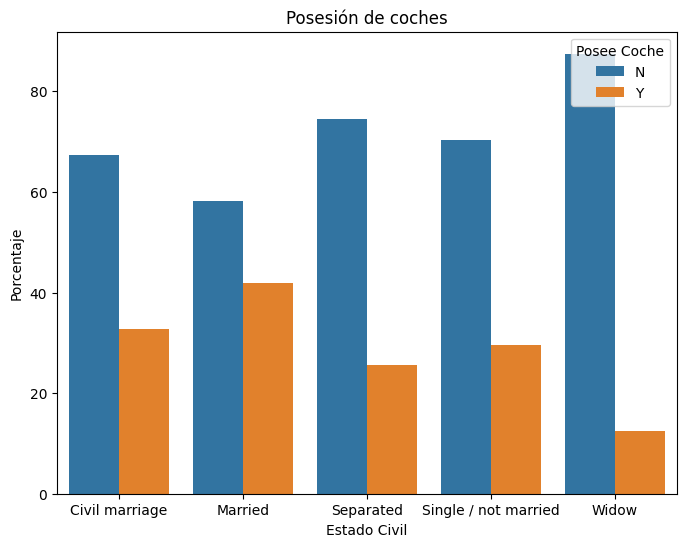

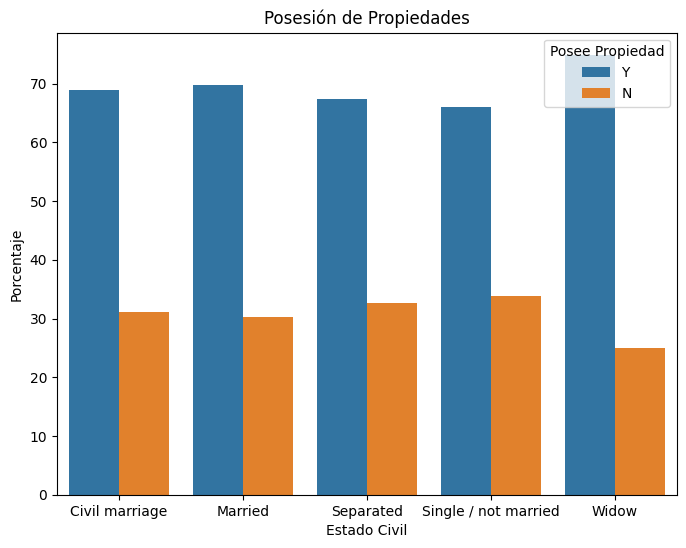

In [124]:
# Normalizar datos para la posesión de coches
plt.figure(figsize=(8, 6))
car_plot = (df.groupby('NAME_FAMILY_STATUS')['FLAG_OWN_CAR']
            .value_counts(normalize=True)
            .mul(100)
            .rename('Porcentaje')
            .reset_index())

sns.barplot(x='NAME_FAMILY_STATUS', y='Porcentaje', hue='FLAG_OWN_CAR', data=car_plot)
plt.title('Posesión de coches')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje')
plt.legend(title='Posee Coche', loc='upper right')
plt.show()

# Normalizar datos para la posesión de propiedades
plt.figure(figsize=(8, 6))
realty_plot = (df.groupby('NAME_FAMILY_STATUS')['FLAG_OWN_REALTY']
               .value_counts(normalize=True)
               .mul(100)
               .rename('Porcentaje')
               .reset_index())

sns.barplot(x='NAME_FAMILY_STATUS', y='Porcentaje', hue='FLAG_OWN_REALTY', data=realty_plot)
plt.title('Posesión de Propiedades')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje')
plt.legend(title='Posee Propiedad', loc='upper right')
plt.show()



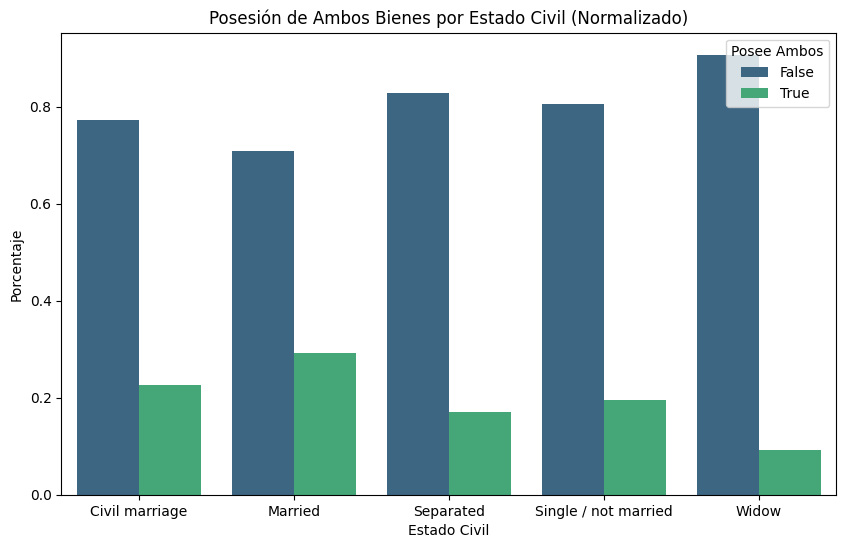

In [125]:
# Crear una nueva columna que indique si poseen ambas cosas o no
df['Ambas_Posesiones'] = (df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y')

# Calcular las proporciones de posesión de ambas cosas por estado civil
proporciones = df.groupby('NAME_FAMILY_STATUS')['Ambas_Posesiones'].value_counts(normalize=True).rename('Porcentaje').reset_index()

# Graficar los datos normalizados
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_FAMILY_STATUS', y='Porcentaje', hue='Ambas_Posesiones', data=proporciones, palette='viridis')
plt.title('Posesión de Ambos Bienes por Estado Civil (Normalizado)')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje')
plt.legend(title='Posee Ambos', loc='upper right')
plt.show()



Concluciones: las personas casadas tienen mas probabilidad de tener propiedades y coches que las personas divorciadas o solteras. Tambien podemos observar que en posesion de coches hay mayor gente que no tiene un coche a la que si lo tiene, y en posesion de propiedades pasa alrevez.

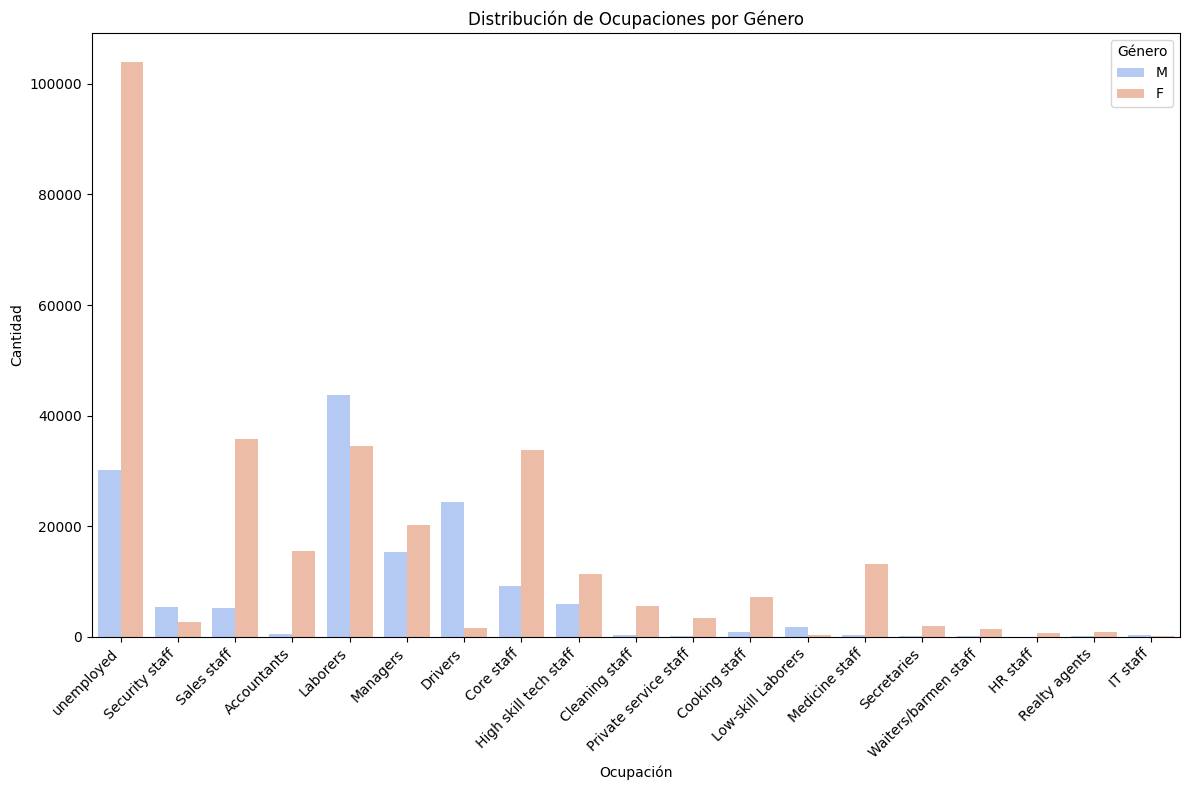

In [126]:
# Gráfico de barras apiladas para la distribución de ocupaciones por género
plt.figure(figsize=(12, 8))
sns.countplot(x='OCCUPATION_TYPE', hue='CODE_GENDER', data=df, palette='coolwarm')
plt.title('Distribución de Ocupaciones por Género')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.legend(title='Género', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

Concluciones: El genero femenino domina en la gran mayoria de ocupaciones, a excepcion a unas cuantas como ('Laborers', 'Drivers', 'Security staff', etc.)

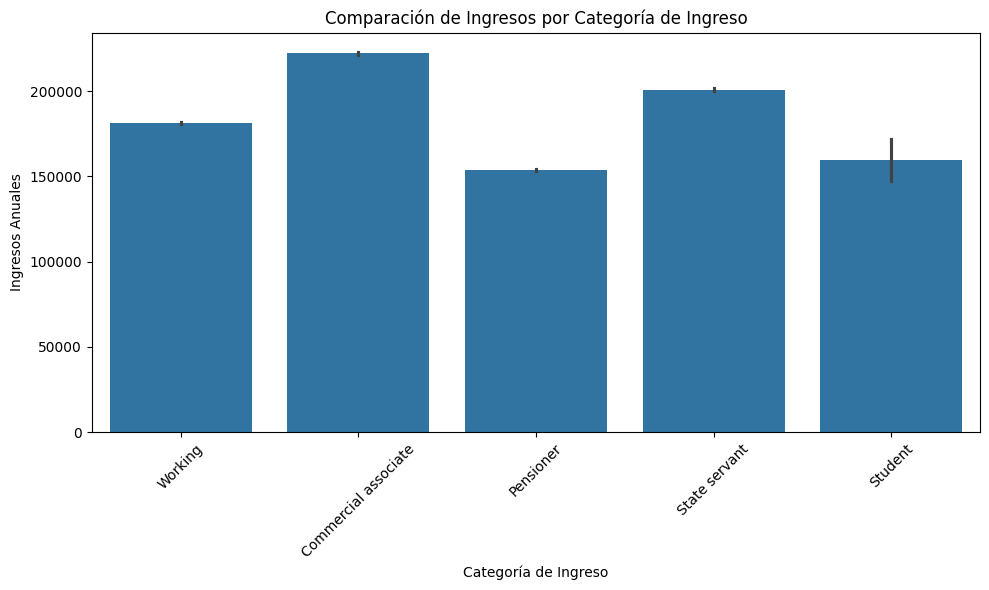

In [127]:
# Gráfico de barras para comparar ingresos entre categorías de ingresos
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=df)
plt.title('Comparación de Ingresos por Categoría de Ingreso')
plt.xlabel('Categoría de Ingreso')
plt.ylabel('Ingresos Anuales')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()


Concluciones: En el grafico se puede observar que la categoria de ingresos mas alta es 'Commercial associate' seguida de 'State servant', la categoria de ingresos mas baja es 'Pensioner' pero no esta tan alejada de 'Student' o 'Working'

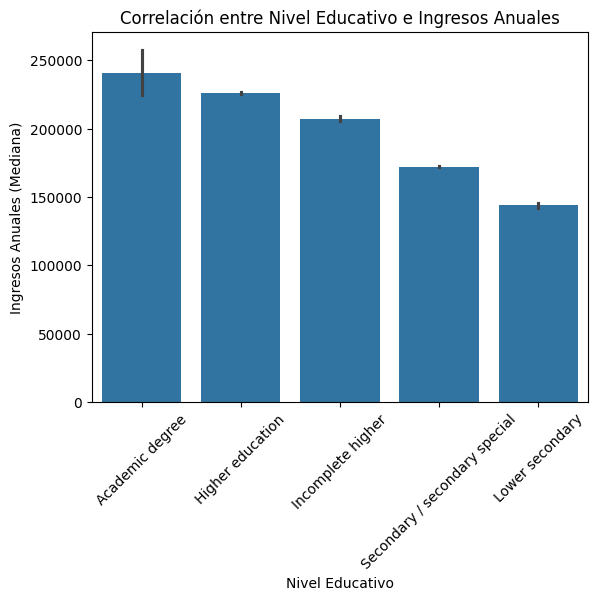

In [128]:
# Calcular la mediana de ingresos anuales por nivel educativo
median_income_education = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].median().sort_values(ascending=False)

# Obtener los niveles educativos ordenados por la mediana de ingresos
ordered_education_levels = median_income_education.index

# Crear el gráfico de barras ordenado
sns.barplot(x=df['NAME_EDUCATION_TYPE'], y=df['AMT_INCOME_TOTAL'], order=ordered_education_levels)
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Anuales (Mediana)')
plt.title('Correlación entre Nivel Educativo e Ingresos Anuales')
plt.xticks(rotation=45)
plt.show()


Concluciones: El gráfico que muestra la correlación entre el nivel educativo y los ingresos anuales, Se observa una tendencia general donde niveles educativos más altos tienden a tener mayores 
ingresos anuales. Esta relación sugiere que hay una asociación entre el nivel de educación alcanzado y el nivel de ingresos que una persona puede tener. 

                         count      mean       std  min  25%  50%  75%   max
NAME_FAMILY_STATUS                                                          
Civil marriage         36532.0  0.380598  0.663418  0.0  0.0  0.0  1.0   9.0
Married               299828.0  0.507027  0.776828  0.0  0.0  0.0  1.0  12.0
Separated              27251.0  0.348281  0.638504  0.0  0.0  0.0  1.0  14.0
Single / not married   55271.0  0.181289  0.457799  0.0  0.0  0.0  0.0  19.0
Widow                  19675.0  0.101601  0.400004  0.0  0.0  0.0  0.0   4.0


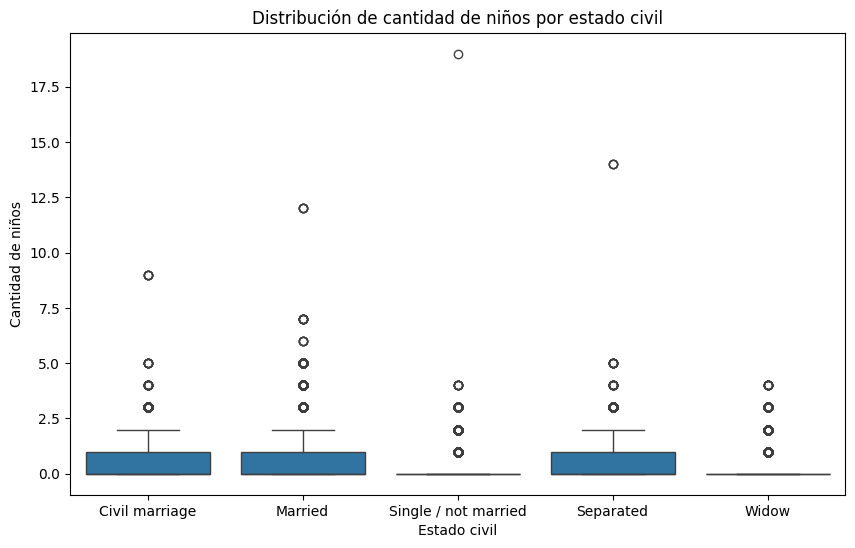

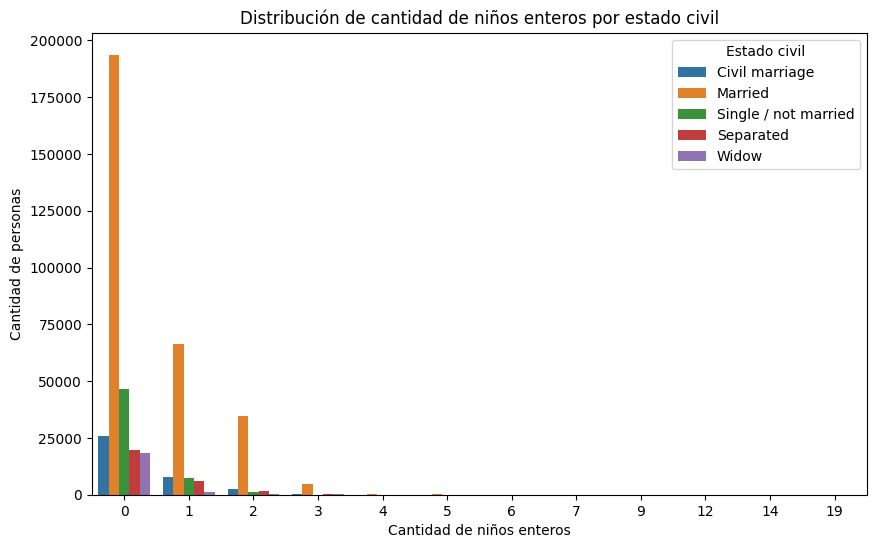

In [129]:
# Copia los datos relevantes en un nuevo DataFrame
datos_interesantes = df[['CNT_CHILDREN', 'NAME_FAMILY_STATUS']].copy()

# Análisis descriptivo
summary = datos_interesantes.groupby('NAME_FAMILY_STATUS')['CNT_CHILDREN'].describe()
print(summary)

# Redondea la cantidad de niños a números enteros en el DataFrame original
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].round().astype(int)

# Crear el boxplot con la cantidad de niños como números enteros
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_FAMILY_STATUS', y='CNT_CHILDREN', data=df)
plt.title('Distribución de cantidad de niños por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de niños')
plt.show()


# Análisis comparativo

# Redondear la cantidad de niños a números enteros en el DataFrame original
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].round().astype(int)

# Crear gráfico de barras para la cantidad de niños por estado civil
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CNT_CHILDREN', hue='NAME_FAMILY_STATUS')
plt.title('Distribución de cantidad de niños enteros por estado civil')
plt.xlabel('Cantidad de niños enteros')
plt.ylabel('Cantidad de personas')
plt.legend(title='Estado civil')
plt.show()


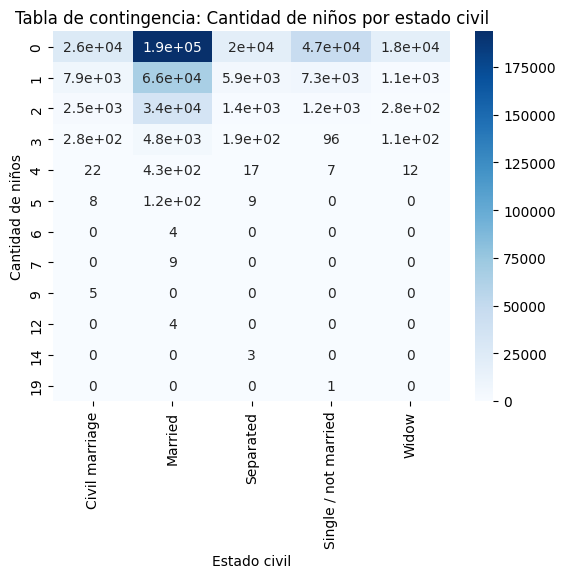

NAME_FAMILY_STATUS  Civil marriage  Married  Separated  Single / not married  \
CNT_CHILDREN                                                                   
0                            25824   193672      19697                 46671   
1                             7898    66352       5900                  7307   
2                             2492    34487       1439                  1189   
3                              283     4756        186                    96   
4                               22      428         17                     7   
5                                8      116          9                     0   
6                                0        4          0                     0   
7                                0        9          0                     0   
9                                5        0          0                     0   
12                               0        4          0                     0   
14                               0      

In [130]:
# Heatmap o tabla de contingencia
contingency_table = pd.crosstab(index=datos_interesantes['CNT_CHILDREN'], columns=datos_interesantes['NAME_FAMILY_STATUS'])
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Tabla de contingencia: Cantidad de niños por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de niños')
plt.show()

# Asi se ven los valores enteros 
print(contingency_table)



In [131]:
# Las personas en cada estado civil
personas_por_estado_civil = df['NAME_FAMILY_STATUS'].value_counts()

print(personas_por_estado_civil)


NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64


Concluciones: Se pueden identificar diferencias en la distribución de la cantidad de niños entre diferentes estados civiles. Por ejemplo, los estados civiles (single/not married y widow) tienden a no tener hijos, pero otro lado el estado civil (Married) es el estado civil que tiende a tener mas hijos entre 1 y 3, aunque tambien es el estado civil con mas personas registradas 

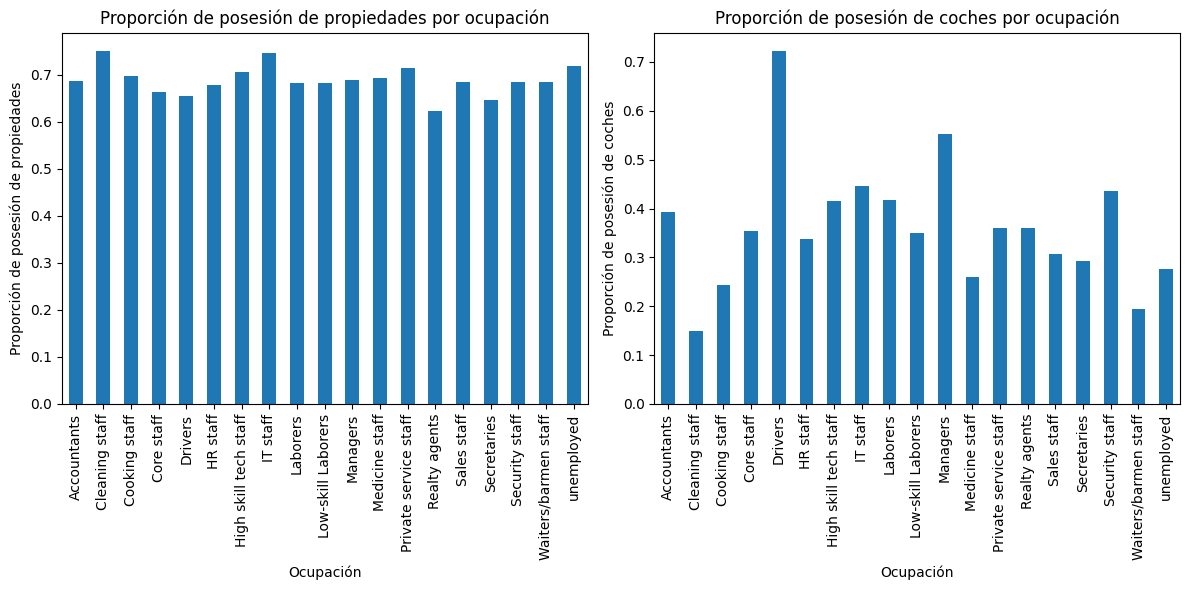

In [132]:
# Convertir 'FLAG_OWN_CAR' y 'FLAG_OWN_REALTY' a valores numéricos
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

# Filtrar datos relevantes
datos_vehiculos_propiedades = df[['OCCUPATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

# Análisis descriptivo inicial
ocupacion_propiedades = datos_vehiculos_propiedades.groupby('OCCUPATION_TYPE')['FLAG_OWN_REALTY'].mean()
ocupacion_coches = datos_vehiculos_propiedades.groupby('OCCUPATION_TYPE')['FLAG_OWN_CAR'].mean()

# Visualización de tendencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ocupacion_propiedades.plot(kind='bar')
plt.title('Proporción de posesión de propiedades por ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Proporción de posesión de propiedades')

plt.subplot(1, 2, 2)
ocupacion_coches.plot(kind='bar')
plt.title('Proporción de posesión de coches por ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Proporción de posesión de coches')

plt.tight_layout()
plt.show()


Concluciones: Se puede observar que ciertas ocupaciones tienden a tener una mayor proporción de posesión de propiedades que otras. pero no es muy significativa, y tambien se puede identificar ocupaciones donde la tenencia de coches es más común en comparación con otras, como por ejemplo es comun que alguin que es Driver tenga su propio vehiculo, las ocupaciones con menos posecion de coche son Clearing staf, Cooking staff y waiters staff